<a href="https://colab.research.google.com/github/Azmain173/House-Prices---Advanced-Regression-Techniques/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd

In [61]:
train_data = pd.read_csv("/content/train (1).csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
test_data = pd.read_csv("/content/test (1).csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
# Load dataset
df = pd.read_csv("/content/train (1).csv")
df1 = pd.read_csv("/content/test (1).csv")

# Identify feature types
continuous_features = df.select_dtypes(include=['float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)
print("Numerical (Discrete) Features:", numerical_features)


Continuous Features: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical (Discrete) Features: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd

In [64]:
df1 = pd.read_csv("/content/test (1).csv")
# Identify feature types
continuous_features = df1.select_dtypes(include=['float64']).columns.tolist()
categorical_features = df1.select_dtypes(include=['object']).columns.tolist()
numerical_features = df1.select_dtypes(include=['int64']).columns.tolist()

print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)
print("Numerical (Discrete) Features:", numerical_features)

Continuous Features: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical (Discrete) Features: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', '

In [65]:
from sklearn.impute import SimpleImputer



# Define feature categories based on your list
continuous_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                        'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numerical_features = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                      'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                      'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Step 1: Print missing values before imputation
print("\n🚀 Missing Values Before Imputation:")
print(df.isnull().sum())

# Step 2: Define imputers
continuous_imputer = SimpleImputer(strategy='mean')  # Use 'median' if preferred
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

# Step 3: Apply imputations
df[continuous_features] = continuous_imputer.fit_transform(df[continuous_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

# Step 4: Print missing values after imputation
print("\n✅ Missing Values After Imputation:")
print(df.isnull().sum())


🚀 Missing Values Before Imputation:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

✅ Missing Values After Imputation:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [67]:
# Check unique values for categorical columns:
for col in categorical_features:
    print(f"{col}: {df[col].unique()[:10]}")  # Show first 10 unique values

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: ['Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoar

one-hot encoding is typically implemented using pd.get_dummies() in Pandas. However, there are other ways to achieve one-hot encoding, such as using sklearn.preprocessing.OneHotEncoder(). If you're not seeing pd.get_dummies() in the code, the encoding might be implemented using OneHotEncoder() or another approach.

Different Ways to Perform One-Hot Encoding
1. Using pd.get_dummies() (Pandas)

encoding categorical features, you should consider the following strategies:

1. One-Hot Encoding (OHE)
Use for nominal (unordered) categorical variables.
Creates separate binary columns for each category.
Example: MSZoning → RL, RM, C (all), FV, RH → 5 binary columns.

Ordinal Encoding
Use for ordinal (ordered) categorical variables.
Maps categories to numerical values based on hierarchy.

ordinal encoding and binary encoding are different types of categorical encoding techniques.

1. Ordinal Encoding
Assigns integer values (0, 1, 2, …) based on an inherent order or ranking.
Used when categories have a meaningful order (e.g., ExterQual: Ex > Gd > TA > Fa > Po).


2. Binary Encoding
Converts categorical values into binary representation and splits them into separate columns.
Useful for high-cardinality (many unique categories) variables.

Problem: TypeError: unhashable type: 'dict_keys'
This error occurs because df[ordinal_features.keys()] tries to use a dict_keys object as an index, which is not directly compatible with Pandas.

Solution: Convert dict_keys to a List

df[ordinal_features.keys()] = ordinal_encoder.fit_transform(df[list(ordinal_features.keys())])

Fix: Change .keys() to list(ordinal_features.keys())

df[list(ordinal_features.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_features.keys())])



Key Fixes & Explanations
Used list(ordinal_features.keys()) instead of ordinal_features.keys()

dict_keys is not directly usable as a column index, so it needs to be converted to a list.
Ensured sparse_output=False in OneHotEncoder

If using Scikit-Learn 1.2+, sparse=False should be replaced with sparse_output=False.

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pandas as pd

# Define transformations
num_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
                'SaleType', 'SaleCondition']
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

# Define ordinal mapping (example for ExterQual: Poor < Fair < Good < Excellent)
ordinal_mapping = [
    ["Po", "Fa", "TA", "Gd", "Ex"],  # ExterQual
    ["Po", "Fa", "TA", "Gd", "Ex"],  # ExterCond
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # BsmtQual
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # BsmtCond
    ["NA", "No", "Mn", "Av", "Gd"],  # BsmtExposure
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],  # BsmtFinType1
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],  # BsmtFinType2
    ["Po", "Fa", "TA", "Gd", "Ex"],  # HeatingQC
    ["Po", "Fa", "TA", "Gd", "Ex"],  # KitchenQual
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # FireplaceQu
    ["NA", "Unf", "RFn", "Fin"],  # GarageFinish
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # GarageQual
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"],  # GarageCond
    ["NA", "Fa", "TA", "Gd", "Ex"],  # PoolQC
    ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"]  # Fence
]

# Define transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
ord_transformer = OrdinalEncoder(categories=ordinal_mapping)

# Combine all transformations
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
    ('ord', ord_transformer, ordinal_features)
])

# Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Transform the data
df_transformed_array = pipeline.fit_transform(df)

# Convert to DataFrame
df_transformed = pd.DataFrame(df_transformed_array)


print(df_transformed.head())



                                                   0
0    (0, 0)\t-0.22937175311444924\n  (0, 1)\t0.51...
1    (0, 0)\t0.4519361005305317\n  (0, 1)\t-0.574...
2    (0, 0)\t-0.09311018238545306\n  (0, 1)\t0.32...
3    (0, 0)\t-0.45647437099610955\n  (0, 1)\t-0.5...
4    (0, 0)\t0.6336181948358599\n  (0, 1)\t1.3645...


In [72]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the test dataset (df1)
df1 = pd.read_csv("/content/test (1).csv")  # Replace with your actual test file path

# Define feature categories
continuous_features = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                       'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                        'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
                        'SaleType', 'SaleCondition']

numerical_features = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                      'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                      'MiscVal', 'MoSold', 'YrSold']

# Step 1: Print missing values before imputation
print("\n🚀 Missing Values Before Imputation:")
print(df1.isnull().sum())

# Step 2: Define imputers
continuous_imputer = SimpleImputer(strategy='mean')  # Fill missing continuous values with mean
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Fill missing categorical values with most frequent

# Step 3: Apply imputations to categorical and continuous features
df1[continuous_features] = continuous_imputer.fit_transform(df1[continuous_features])
df1[categorical_features] = categorical_imputer.fit_transform(df1[categorical_features])

# Step 4: Print missing values after imputation
print("\n✅ Missing Values After Imputation:")
print(df1.isnull().sum())





🚀 Missing Values Before Imputation:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

✅ Missing Values After Imputation:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [73]:
# Check if any NaN values remain in categorical features after imputation
print("NaN values in categorical features after imputation:")
print(df1[categorical_features].isnull().sum())


NaN values in categorical features after imputation:
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
Foundation       0
Heating          0
CentralAir       0
Electrical       0
Functional       0
GarageType       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [74]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder with handling unknown categories (set unknown_value=-1)
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Apply ordinal encoding to categorical features
df1[categorical_features] = ordinal_encoder.fit_transform(df1[categorical_features])

# Check the encoded columns
print(df1[categorical_features].head())


   MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0       2.0     1.0    0.0       3.0          3.0        0.0        4.0   
1       3.0     1.0    0.0       0.0          3.0        0.0        0.0   
2       3.0     1.0    0.0       0.0          3.0        0.0        4.0   
3       3.0     1.0    0.0       0.0          3.0        0.0        4.0   
4       3.0     1.0    0.0       0.0          1.0        0.0        4.0   

   LandSlope  Neighborhood  Condition1  ...  MasVnrType  Foundation  Heating  \
0        0.0          12.0         1.0  ...         1.0         1.0      0.0   
1        0.0          12.0         2.0  ...         1.0         1.0      0.0   
2        0.0           8.0         2.0  ...         1.0         2.0      0.0   
3        0.0           8.0         2.0  ...         1.0         2.0      0.0   
4        0.0          22.0         2.0  ...         1.0         2.0      0.0   

   CentralAir  Electrical  Functional  GarageType  PavedDrive  SaleT

In [75]:
# Check if any NaN values are present in the entire DataFrame
print("Checking for any NaN values in the entire dataset:")
print(df1.isnull().sum())


Checking for any NaN values in the entire dataset:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [76]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder with handling unknown categories
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Apply ordinal encoding to categorical features
df1[categorical_features] = ordinal_encoder.fit_transform(df1[categorical_features])

# Check the first few rows to confirm the encoding
print(df1[categorical_features].head())


   MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0       2.0     1.0    0.0       3.0          3.0        0.0        4.0   
1       3.0     1.0    0.0       0.0          3.0        0.0        0.0   
2       3.0     1.0    0.0       0.0          3.0        0.0        4.0   
3       3.0     1.0    0.0       0.0          3.0        0.0        4.0   
4       3.0     1.0    0.0       0.0          1.0        0.0        4.0   

   LandSlope  Neighborhood  Condition1  ...  MasVnrType  Foundation  Heating  \
0        0.0          12.0         1.0  ...         1.0         1.0      0.0   
1        0.0          12.0         2.0  ...         1.0         1.0      0.0   
2        0.0           8.0         2.0  ...         1.0         2.0      0.0   
3        0.0           8.0         2.0  ...         1.0         2.0      0.0   
4        0.0          22.0         2.0  ...         1.0         2.0      0.0   

   CentralAir  Electrical  Functional  GarageType  PavedDrive  SaleT

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the dataset (df1)
df1 = pd.read_csv("/content/test (1).csv")  # Replace with your actual test file path

# Define feature categories
continuous_features = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                       'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                        'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
                        'SaleType', 'SaleCondition']

numerical_features = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                      'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                      'MiscVal', 'MoSold', 'YrSold']

# Step 1: Impute Missing Values (if not done yet)
# Define imputers
continuous_imputer = SimpleImputer(strategy='mean')  # Fill missing continuous values with mean
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Fill missing categorical values with most frequent

# Apply imputations (assuming you've already handled this earlier)
df1[continuous_features] = continuous_imputer.fit_transform(df1[continuous_features])
df1[categorical_features] = categorical_imputer.fit_transform(df1[categorical_features])
df1[numerical_features] = continuous_imputer.fit_transform(df1[numerical_features])

# Step 2: Encoding Process
# Using ColumnTransformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        # For continuous features, we just use imputation (no encoding)
        ('continuous', continuous_imputer, continuous_features),

        # For categorical features, we use OneHotEncoder for nominal features (with handle_unknown='ignore')
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 3: Fit and Transform the Data using the Pipeline
df1_transformed = pipeline.fit_transform(df1)

# Convert to DataFrame for easier readability
df1_transformed_df = pd.DataFrame(df1_transformed)

# Display the transformed data
print(df1_transformed_df.head())



    0      1      2      3       4       5    6    7       8    9    ...  166  \
0  80.0    0.0  468.0  144.0   270.0   882.0  0.0  0.0  1961.0  1.0  ...  0.0   
1  81.0  108.0  923.0    0.0   406.0  1329.0  0.0  0.0  1958.0  1.0  ...  0.0   
2  74.0    0.0  791.0    0.0   137.0   928.0  0.0  0.0  1997.0  2.0  ...  0.0   
3  78.0   20.0  602.0    0.0   324.0   926.0  0.0  0.0  1998.0  2.0  ...  0.0   
4  43.0    0.0  263.0    0.0  1017.0  1280.0  0.0  0.0  1992.0  2.0  ...  0.0   

   167  168  169  170  171  172  173  174  175  
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 176 columns]


In [79]:
df.drop(columns=['Id'], inplace=True)  # Drop 'Id' column
target = df['SalePrice']  # Store 'SalePrice' in target variable
df.drop(columns=['SalePrice'], inplace=True)  # Remove 'SalePrice' only from df

# Now, print target statistics instead of df['SalePrice']
print(target.describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [80]:
print(df.describe())
#check data description

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   180.569112   456.098091   161.319273  ..


Since SalePrice is a continuous variable in a regression problem, you cannot use value_counts(normalize=True) like in classification. Instead, you should analyze its distribution using statistical and visualization techniques.


For classification, you check the target variable's balance to understand if your classes are underrepresented or overrepresented. In regression, we care about the distribution of the continuous target variable (like SalePrice), but in classification, you focus on the distribution of class labels.

Here’s a breakdown for both:

For Classification Problems:
1. Check the Distribution of Classes
Use value_counts(normalize=True) to see the proportion of each class:

print(df['TargetClass'].value_counts(normalize=True))

If the class distribution is imbalanced (i.e., one class has significantly more samples than the others), you might need techniques like resampling (undersampling or oversampling) or adjusting class weights during model training.

2. check bar plot.

For Regression Problems:
In regression, your goal is to analyze how the continuous target variable behaves.

1. Summary Statistics
You analyze basic stats (like mean, median, standard deviation) to understand the distribution of the target variable.

2. Histogram
You visualize the distribution of the target variable using a histogram:

In [81]:
import seaborn as sns


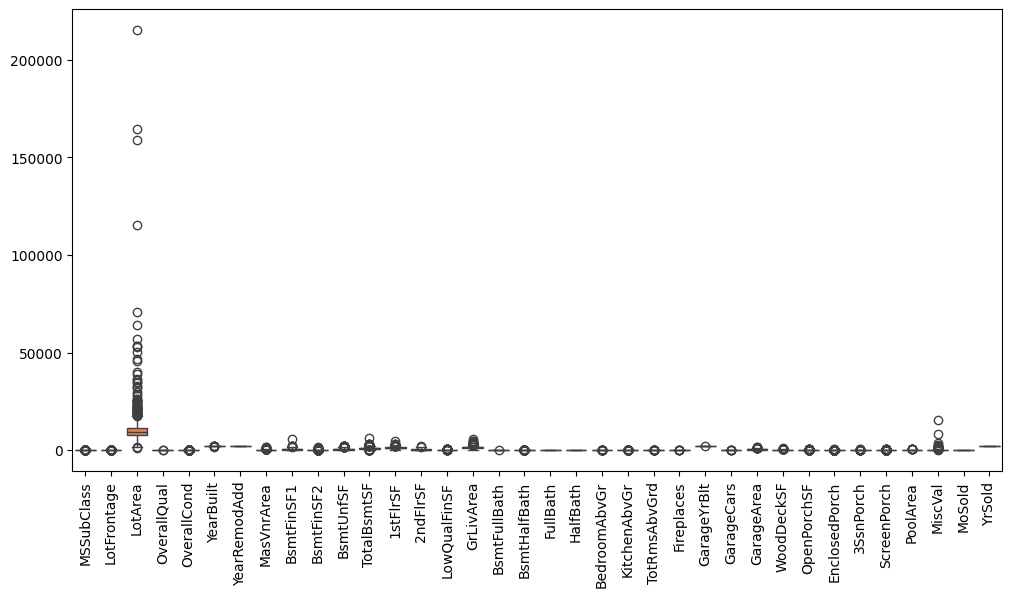

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()


In [83]:
import numpy as np
import pandas as pd

# Identify numerical features after encoding
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute IQR for all numerical features
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Count outliers per feature
outliers_count = outliers.sum().sort_values(ascending=False)
print(outliers_count)


EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
LotFrontage      106
MSSubClass       103
MasVnrArea        98
BsmtHalfBath      82
OpenPorchSF       77
LotArea           69
KitchenAbvGr      68
TotalBsmtSF       61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
YearBuilt          7
PoolArea           7
BsmtFinSF1         7
Fireplaces         5
GarageCars         5
OverallQual        2
2ndFlrSF           2
BsmtFullBath       1
GarageYrBlt        1
MoSold             0
FullBath           0
HalfBath           0
YearRemodAdd       0
YrSold             0
dtype: int64


In [91]:
df_clean = df[~outliers.any(axis=1)]
print(f"Original shape: {df.shape}, After removing outliers: {df_clean.shape}")


Original shape: (1460, 79), After removing outliers: (566, 79)


In [92]:
# Count how many outlier values each row has
outlier_counts_per_row = outliers.sum(axis=1)

# Define a threshold (e.g., only remove rows with more than 5 outliers)
threshold = 5  # Adjust as needed
df_clean = df[outlier_counts_per_row <= threshold]

print(f"Original shape: {df.shape}, After removing outliers: {df_clean.shape}")


Original shape: (1460, 79), After removing outliers: (1447, 79)


446 rows are too few and you're concerned about losing too much data, you might want to relax the threshold or consider outlier treatment methods like capping or winsorization (replacing extreme values with more reasonable ones).

Outlier Treatment with Capping or Winsorization
Instead of removing rows, you can cap or winsorize extreme outliers, which replaces the outliers with a less extreme value (usually the nearest valid value). This can be useful to retain data without losing valuable rows.

Capping (Truncation):
Capping involves replacing the extreme values in your dataset with the nearest values that are within a specified range. This can be done based on the IQR (Interquartile Range) or Z-scores.

Here's how to cap outliers using IQR:

In [93]:
# Ensure that all data in df is numeric
df = df.apply(pd.to_numeric, errors='coerce')  # Coerce any non-numeric values into NaN

# Select only numeric columns for IQR calculation (in case there are any remaining non-numeric columns)
numeric_df = df.select_dtypes(include=['number'])

# Calculate the IQR (Interquartile Range) for each feature
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside the range: [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df_clean = df.copy()
df_clean[numeric_df.columns] = df_clean[numeric_df.columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify the result
print(f"Original shape: {df.shape}, After capping: {df_clean.shape}")



Original shape: (1460, 79), After capping: (1460, 79)


Original shape: (1460, 225): Your dataset has 1460 rows and 225 features.
After capping: (1460, 225): The number of rows and features remain the same, which is expected because capping doesn't remove any data; it just replaces extreme values with the boundaries.


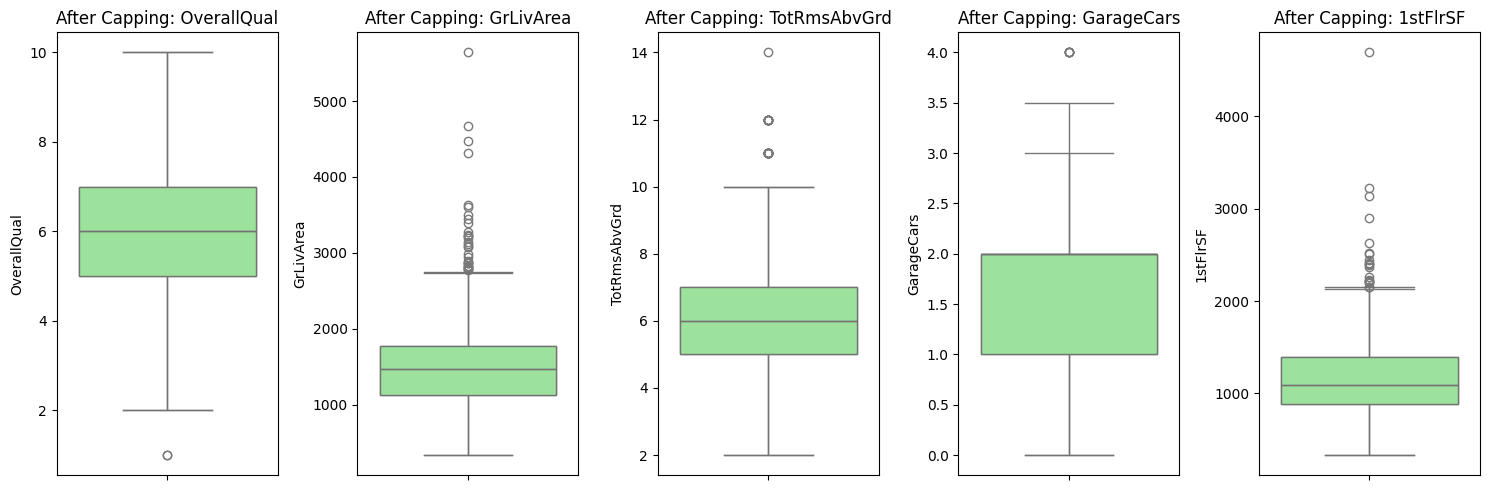

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected numerical columns for visualization (adjust the column names as per your dataset)
selected_columns = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF']

# Create a subplot to compare boxplots
fig, axes = plt.subplots(1, len(selected_columns), figsize=(15, 5))

# Plot boxplots for each feature before and after capping
for i, col in enumerate(selected_columns):
    # Boxplot before capping
    sns.boxplot(data=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Before Capping: {col}")

    # Boxplot after capping
    sns.boxplot(data=df_clean[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"After Capping: {col}")

plt.tight_layout()
plt.show()


In [95]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (replace outliers with the 5th and 95th percentiles)
df_clean = df.copy()

# Apply winsorization to numerical columns
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean[col] = winsorize(df_clean[col], limits=[0.05, 0.05])  # 5% for both sides

# Verify the result
print(f"Original shape: {df.shape}, After winsorization: {df_clean.shape}")


Original shape: (1460, 79), After winsorization: (1460, 79)


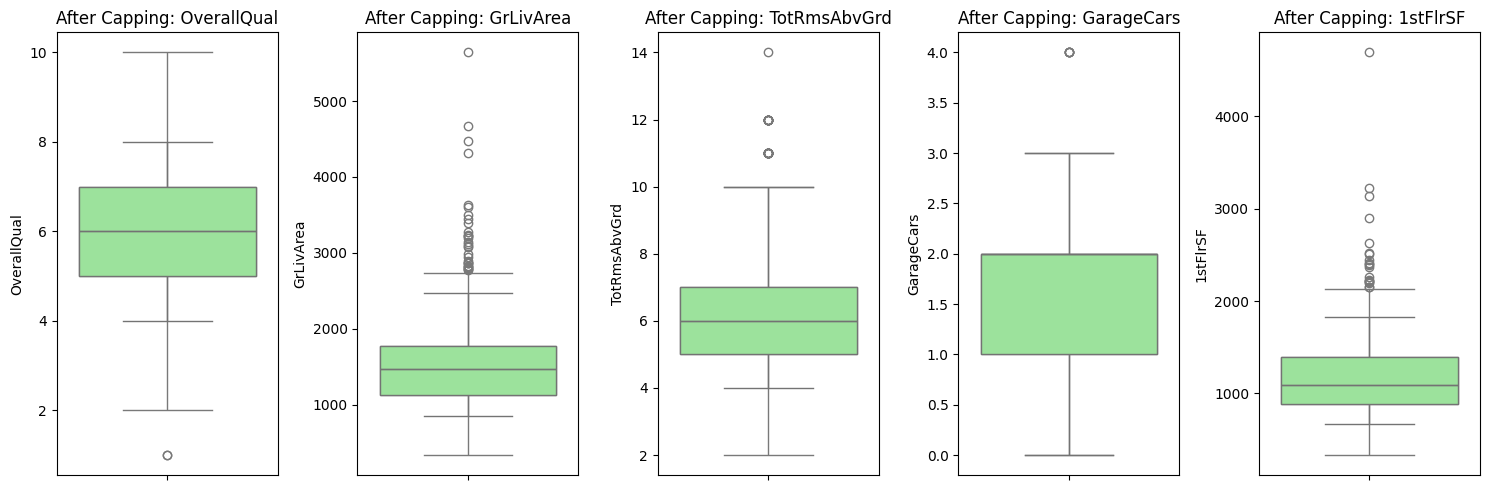

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected numerical columns for visualization (adjust the column names as per your dataset)
selected_columns = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF']

# Create a subplot to compare boxplots
fig, axes = plt.subplots(1, len(selected_columns), figsize=(15, 5))

# Plot boxplots for each feature before and after capping
for i, col in enumerate(selected_columns):
    # Boxplot before capping
    sns.boxplot(data=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Before Capping: {col}")

    # Boxplot after capping
    sns.boxplot(data=df_clean[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f"After Capping: {col}")

plt.tight_layout()
plt.show()

In [121]:
train_data = pd.read_csv("/content/train (1).csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
print("Categorical Features:", categorical_features)
print("Columns in DataFrame:", df.columns.tolist())
print("Missing Columns:", [col for col in categorical_features if col not in df.columns])


Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Columns in DataFrame: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 

In [123]:
print(df[categorical_features].isnull().sum())


MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [124]:
df[categorical_features] = df[categorical_features].fillna("Missing")

# Now apply imputation
df[categorical_features] = pd.DataFrame(
    categorical_imputer.fit_transform(df[categorical_features]),
    columns=categorical_features, index=df.index
)


In [125]:
print("\n✅ Missing Values After Fix:")
print(df[categorical_features].isnull().sum())



✅ Missing Values After Fix:
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [127]:
from sklearn.impute import SimpleImputer



# Define feature categories based on your list
continuous_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                        'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numerical_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                      'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                      'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# Step 1: Print missing values before imputation
print("\n🚀 Missing Values Before Imputation:")
print(df.isnull().sum())

# Step 2: Define imputers
continuous_imputer = SimpleImputer(strategy='mean')  # Use 'median' if preferred
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

# Step 3: Apply imputations
df[continuous_features] = continuous_imputer.fit_transform(df[continuous_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

# Step 4: Print missing values after imputation
print("\n✅ Missing Values After Imputation:")
print(df.isnull().sum())


🚀 Missing Values Before Imputation:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

✅ Missing Values After Imputation:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64


In [132]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

# Display the shapes to confirm
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1168, 79), y_train shape: (1168,)
X_test shape: (292, 79), y_test shape: (292,)


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


In [134]:
# Calculate MAE, MSE, and R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 18004.337499999998
Mean Squared Error (MSE): 862649278.1747137
R² Score: 0.8875342123824658


In [146]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_imputed, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test_imputed)

# Evaluate the model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - MAE: {mae_gbr}")
print(f"Gradient Boosting - MSE: {mse_gbr}")
print(f"Gradient Boosting - R²: {r2_gbr}")



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighbor

Gradient Boosting - MAE: 17140.13839952177
Gradient Boosting - MSE: 750288913.4527429
Gradient Boosting - R²: 0.9021829198411772


In [140]:
pip install xgboost


In [141]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - MSE: {mse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")


XGBoost - MAE: 16227.472709760274
XGBoost - MSE: 688575182.0977988
XGBoost - R²: 0.9102286964728304


In [138]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt}")
print(f"Decision Tree - MSE: {mse_dt}")
print(f"Decision Tree - R²: {r2_dt}")


Decision Tree - MAE: 27674.81506849315
Decision Tree - MSE: 1634837304.7465754
Decision Tree - R²: 0.7868620889663432


no needed just did for my own happiness.

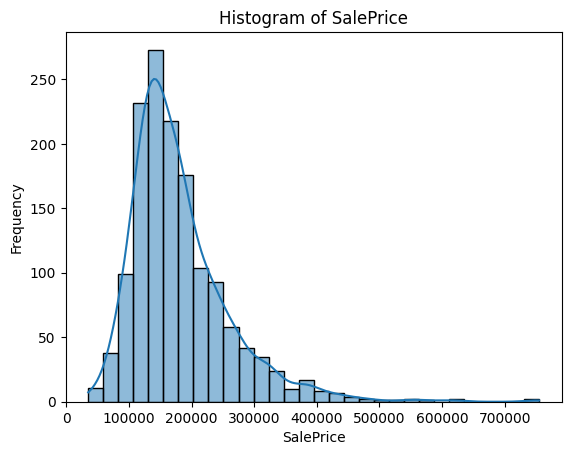

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram for 'SalePrice'
sns.histplot(target, bins=30, kde=True)
plt.title("Histogram of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


histogram of SalePrice, you can infer the following:

Right-Skewed Distribution:

The histogram shows that most house prices are concentrated on the left (lower price range), while fewer houses exist in the higher price range.
The distribution has a long tail on the right, meaning there are some expensive houses that are far above the average.
Potential Need for Transformation:

Since regression models perform better with normally distributed target variables, you might consider applying a log transformation (log(SalePrice)) to make it more symmetric.
Outliers in High Price Range:

The long right tail suggests the presence of high-value outliers, which can impact your model’s performance.
You may need to check and decide whether to keep or remove extreme outliers.
Modeling Implications:

If you use a linear regression model, it assumes normally distributed residuals. A skewed target variable might violate this assumption.
Using transformations like log(SalePrice), Box-Cox, or other methods can help improve model performance.

In [ ]:
from scipy.stats import skew, kurtosis

# Skewness and Kurtosis for 'SalePrice' (stored in 'target')
print("Skewness:", skew(target))
print("Kurtosis:", kurtosis(target))



Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


1. Skewness: 1.88
A skewness of 1.88 indicates a right-skewed (positive skew) distribution.
This aligns with what we observed in your histogram: most house prices are on the lower side, with some very high-priced outliers.
Implication: Right-skewed data can negatively impact regression models (especially linear regression). You may need a log transformation (log(SalePrice)) to make the distribution more symmetric.
2. Kurtosis: 6.51
Kurtosis above 3 (excess kurtosis) means the distribution has heavy tails and is leptokurtic.
This suggests that there are more extreme values (outliers) compared to a normal distribution.
Implication: High kurtosis means more extreme price values, which can impact the model's ability to generalize. You might need outlier handling techniques (e.g., capping, Winsorization, or robust regression).

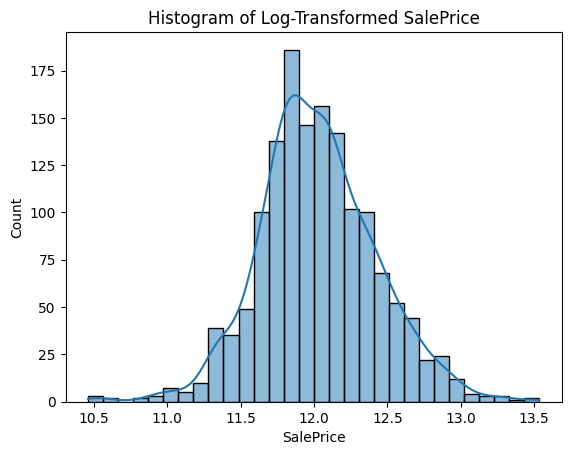

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation on 'SalePrice' (stored in 'target')
target_log = np.log(target)

# Plot histogram for log-transformed 'SalePrice'
sns.histplot(target_log, bins=30, kde=True)
plt.title("Histogram of Log-Transformed SalePrice")
plt.show()

In [ ]:
print("Skewness before log transformation:", target.skew())
print("Skewness after log transformation:", target_log.skew())



Skewness before log transformation: 1.8828757597682129
Skewness after log transformation: 0.12133506220520406



Skewness before log transformation: 1.88: This indicates that the SalePrice distribution is positively skewed (right-skewed), meaning it has a long tail on the right side.

Skewness after log transformation: 0.12: After applying the log transformation, the skewness has reduced significantly, bringing the distribution closer to normal. A skewness near 0 suggests a more symmetric, approximately normal distribution.

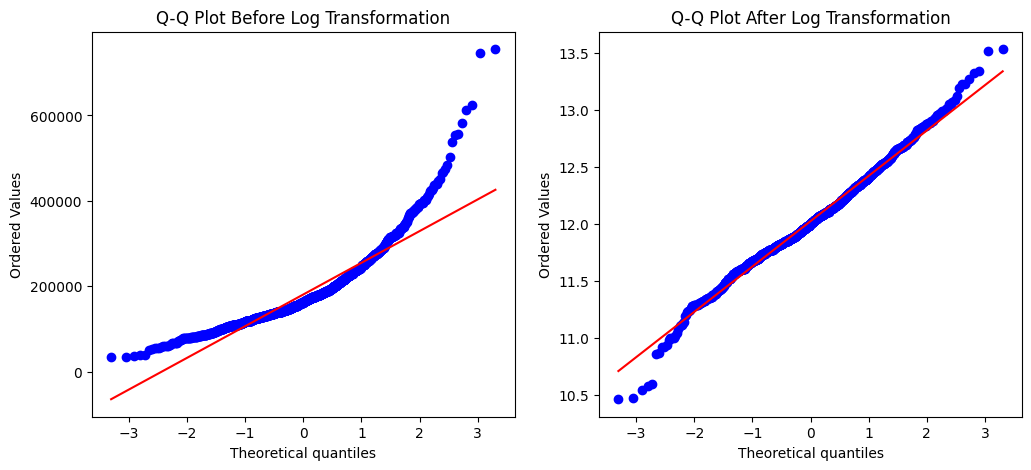

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before log transformation (using target)
stats.probplot(target, dist="norm", plot=ax[0])
ax[0].set_title("Q-Q Plot Before Log Transformation")

# After log transformation (using target_log)
stats.probplot(target_log, dist="norm", plot=ax[1])
ax[1].set_title("Q-Q Plot After Log Transformation")

plt.show()


 Check Normality Using a Q-Q Plot
A Q-Q plot compares your data distribution to a normal distribution.

Goal: The transformed data points should align closer to the diagonal line, indicating normality.



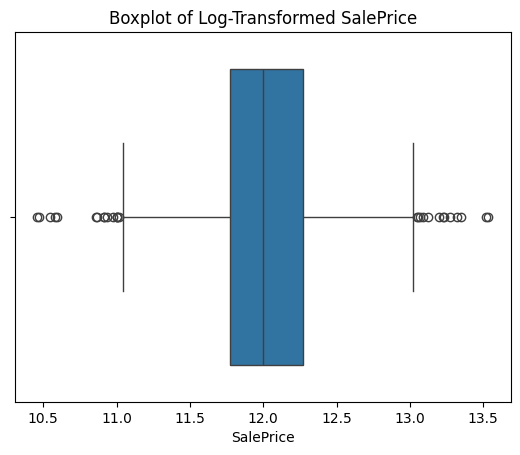

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for log-transformed 'SalePrice' (in target_log)
sns.boxplot(x=target_log)
plt.title("Boxplot of Log-Transformed SalePrice")
plt.show()



boxplot of the log-transformed SalePrice shows that some outliers still exist (the circles outside the whiskers). However, the transformation has compressed the spread, making the distribution more normal-like.

Next Steps:
Decide how to handle the remaining outliers:

If they are legitimate data points, keeping them might be reasonable.
If they are measurement errors or extreme values, consider removing them using the IQR method:
Lower Bound
=
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Lower Bound=Q1−1.5×IQR
Upper Bound
=
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Upper Bound=Q3+1.5×IQR
Another option is using robust regression models like Ridge, Lasso, or Huber Regression to minimize their impact.

In [ ]:
import numpy as np

Q1 = np.percentile(np.log(df['SalePrice']), 25)
Q3 = np.percentile(np.log(df['SalePrice']), 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(np.log(df['SalePrice']) < lower_bound) | (np.log(df['SalePrice']) > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 27


In [ ]:
# Remove the outliers from the dataset
df_filtered = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]


 Visualize the Distribution Again
Boxplot: Plot a boxplot for SalePrice again to confirm that the outliers have been successfully removed.

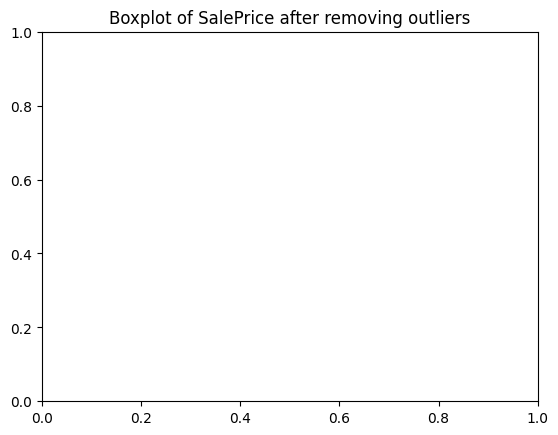

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot after removing outliers
sns.boxplot(x=df_filtered['SalePrice'])
plt.title('Boxplot of SalePrice after removing outliers')
plt.show()


Histogram: A histogram will also show the distribution of SalePrice to check if it's more normally distributed (or close to it).

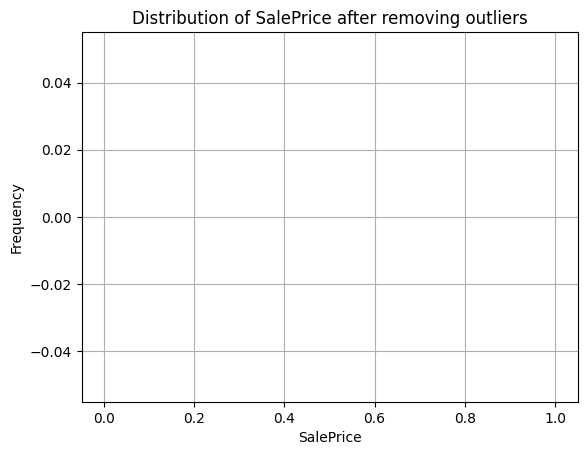

In [ ]:
df_filtered['SalePrice'].hist(bins=50)
plt.title('Distribution of SalePrice after removing outliers')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


If your boxplot and histogram are showing blank after removing the outliers, there might be a couple of potential reasons:

1. All Data Points Are Removed
If the outlier removal step is too aggressive, it's possible that all the data points ended up being removed. This can happen if the boundaries defined by the IQR method were too restrictive.

Check the Data Shape: After removing the outliers, check the size of the dataset

In [ ]:
print("Shape of the dataset after removing outliers:", df_filtered.shape)


Shape of the dataset after removing outliers: (0, 228)


If the shape shows that you have very few or no rows left (e.g., (0, n)), then all the data might have been removed.
2. Incorrect Boundaries or Filters
It's possible that the boundaries you set for removing outliers (lower and upper bounds) might have been calculated incorrectly, leading to an empty dataset.

Check the Boundaries: Print out the lower_bound and upper_bound values to see if they are reasonable.
python
Copy
Edit


In [ ]:
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: 2.403776362224595
Upper Bound: 2.5696728901171104


If these values are too extreme, they could be filtering out a large portion of your data.

It seems like the lower and upper bounds you calculated are very close to each other, which likely results in only a very narrow range of values being retained after removing outliers. In fact, with those bounds (2.4 to 2.57), the dataset might only contain very few or no points at all, especially if your SalePrice values are much higher than this range.

Possible Issues:
Tight Boundaries: The IQR method might have resulted in overly restrictive boundaries. The bounds you calculated are quite narrow, suggesting that the dataset might only contain data points that fall within a very small range.

Log Transformation Effect: If your SalePrice was subjected to a log transformation (like np.log1p(df['SalePrice'])), the values would be compressed, and the range of SalePrice would likely fall within a much smaller scale (closer to 0). This can lead to very tight IQR bounds.

What to Do Next:
1. Check the Range of SalePrice Before Outlier Removal
Check the range of values in the original SalePrice column to get a sense of how wide the data distribution is before applying the IQR method.

In [ ]:
print(df['SalePrice'].describe())


count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


It looks like your SalePrice values have been transformed using a logarithmic scale (given that the mean is around 12, and the range is between 10 and 13). This transformation makes the values much smaller and more compressed, which is likely why your IQR bounds were so tight earlier.

Now that you have the descriptive statistics, you can proceed with the following steps:

1. Adjust the IQR Bounds Using the New Insights
Since your SalePrice values are on a log scale, the IQR values should be adjusted accordingly. The bounds you calculated earlier might have been too narrow because of the transformation.

Let’s calculate the IQR and set new bounds using a more reasonable multiplier (e.g., 1.5 or 2.5):

In [ ]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Adjust bounds using a larger multiple of IQR (1.5 or 2.5)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the new bounds
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: 11.027158653418315
Upper Bound: 13.02168235497344


2. Remove or Cap the Outliers
Once you have the adjusted bounds, you can filter out the outliers or cap them based on these new values. If the new bounds still leave you with reasonable data points, you can proceed with this method.

Remove Outliers:

In [ ]:
df_filtered = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]
print("Shape of the dataset after removing outliers:", df_filtered.shape)


Shape of the dataset after removing outliers: (1432, 228)


Cap Outliers:

In [ ]:
df['SalePrice'] = df['SalePrice'].clip(lower=lower_bound, upper=upper_bound)


3. Replot the Data
After adjusting the bounds, it’s a good idea to replot the boxplot and histogram to ensure that the distribution looks reasonable.

Boxplot:

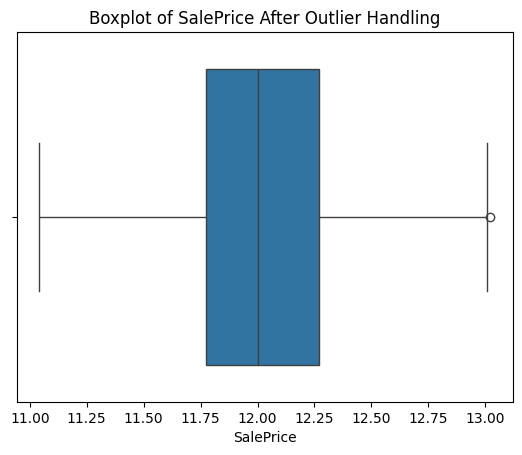

In [ ]:
sns.boxplot(x=df_filtered['SalePrice'])  # or df['SalePrice'] if capping
plt.title('Boxplot of SalePrice After Outlier Handling')
plt.show()


Histogram:

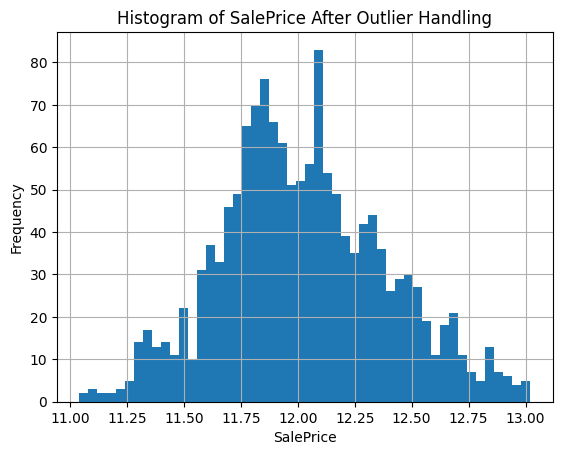

In [ ]:
df_filtered['SalePrice'].hist(bins=50)  # or df['SalePrice'] if capping
plt.title('Histogram of SalePrice After Outlier Handling')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


Standardization (Z-score Scaling):
This method rescales the features to have a mean of 0 and a standard deviation of 1. It is the most widely used scaling technique, especially for linear models, SVM, and neural networks.
Formula:
𝑧
=
𝑋
−
𝜇
𝜎
z=
σ
X−μ
​
  where
𝜇
μ is the mean and
𝜎
σ is the standard deviation.


In [151]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model as before
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Apply label encoding (if you're using label encoding) to the test data (df1)
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns in df1 (same as in X_train)
categorical_cols = df1.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col].astype(str))

# Now, make final predictions using the trained model
y_pred_final = xgb_model.predict(df1.drop(columns=['Id']))  # Drop 'Id' if it's present in df1

# Save the predictions
output = pd.DataFrame({'Id': df1['Id'], 'SalePrice': y_pred_final})
output.to_csv('/sample_submission.csv', index=False)

print("Predictions successfully saved!")




Predictions successfully saved!
